## Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

## Load data

In [2]:
boston=pd.read_csv("BostonHousing.csv")

## Dataset columns & descriptions

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Removing null values

In [5]:
boston.dropna(inplace=True)

In [6]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Visualization

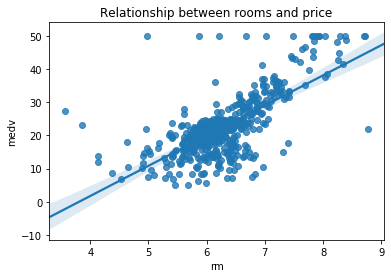

In [7]:
sns.regplot(x='rm',y='medv',data=boston,fit_reg=True)
plt.title("Relationship between rooms and price")
plt.show()

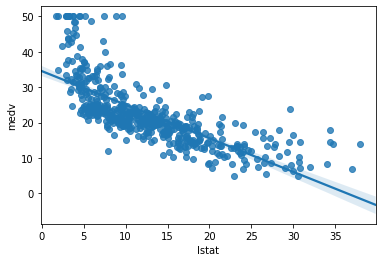

In [8]:
sns.regplot(y='medv',x='lstat',data=boston,fit_reg=True)
plt.show()

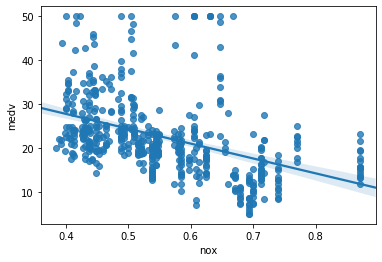

In [9]:
sns.regplot(y='medv',x='nox',data=boston,fit_reg=True)
plt.show()

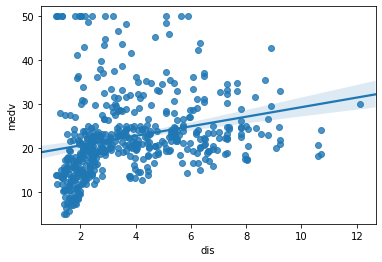

In [10]:
sns.regplot(y='medv',x='dis',data=boston,fit_reg=True)
plt.show()

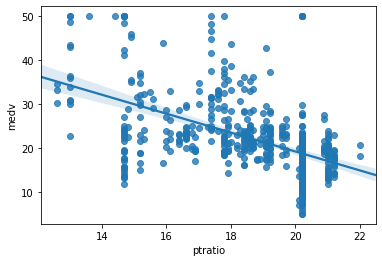

In [11]:
sns.regplot(y='medv',x='ptratio',data=boston,fit_reg=True)
plt.show()

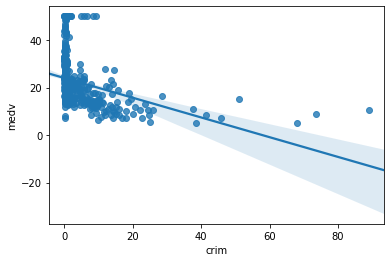

In [12]:
sns.regplot(y='medv',x='crim',data=boston,fit_reg=True)
plt.show()

(array([ 12.,  45., 109.,  94.,  58.,  38.,  44.,  66.,  32.,   8.]),
 array([-5.06403607, -4.10879557, -3.15355507, -2.19831457, -1.24307408,
        -0.28783358,  0.66740692,  1.62264742,  2.57788792,  3.53312842,
         4.48836892]),
 <a list of 10 Patch objects>)

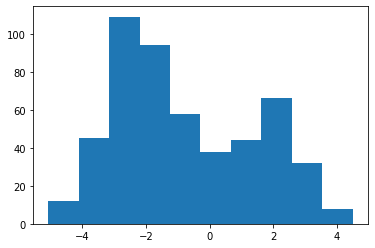

In [13]:
plt.hist(np.log(boston.crim))

(array([  2.,   2.,   4.,  12.,  30., 165., 179.,  76.,  23.,  13.]),
 array([1.2700414 , 1.3602849 , 1.4505284 , 1.54077191, 1.63101541,
        1.72125891, 1.81150241, 1.90174591, 1.99198941, 2.08223291,
        2.17247641]),
 <a list of 10 Patch objects>)

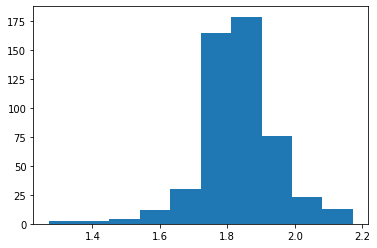

In [14]:
plt.hist(np.log(boston.rm))

(array([  3.,  13.,  23.,  52.,  74.,  81., 101.,  90.,  48.,  21.]),
 array([0.54812141, 0.85698891, 1.1658564 , 1.4747239 , 1.78359139,
        2.09245889, 2.40132639, 2.71019388, 3.01906138, 3.32792888,
        3.63679637]),
 <a list of 10 Patch objects>)

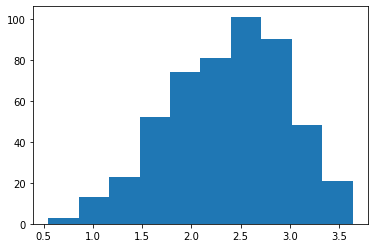

In [15]:
plt.hist(np.log(boston.lstat))

(array([46., 89., 45., 69., 55., 78., 38., 49., 21., 16.]),
 array([-0.95451194, -0.87287208, -0.79123222, -0.70959235, -0.62795249,
        -0.54631262, -0.46467276, -0.38303289, -0.30139303, -0.21975317,
        -0.1381133 ]),
 <a list of 10 Patch objects>)

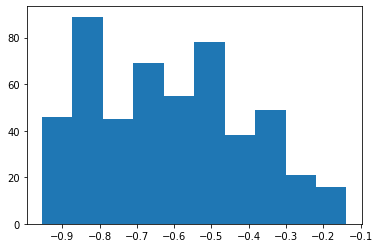

In [16]:
plt.hist(np.log(boston.nox))

(array([22., 56., 81., 79., 55., 65., 57., 58., 28.,  5.]),
 array([0.12186359, 0.35921654, 0.5965695 , 0.83392245, 1.07127541,
        1.30862836, 1.54598132, 1.78333427, 2.02068723, 2.25804019,
        2.49539314]),
 <a list of 10 Patch objects>)

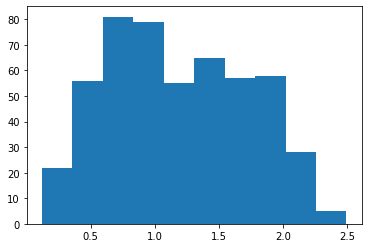

In [17]:
plt.hist(np.log(boston.dis))

(array([ 15.,   1.,  38.,  24.,  34.,  39.,  84.,  62., 153.,  56.]),
 array([2.53369681, 2.58943138, 2.64516594, 2.70090051, 2.75663507,
        2.81236963, 2.8681042 , 2.92383876, 2.97957333, 3.03530789,
        3.09104245]),
 <a list of 10 Patch objects>)

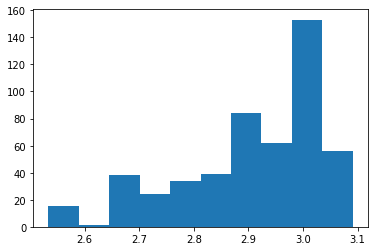

In [18]:
plt.hist(np.log(boston.ptratio))

In [19]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [20]:
boston_selected_var_df=boston.iloc[:,[0,4,5,7,10,12]]

In [21]:
boston_selected_var_df.head()

,crim,nox,rm,dis,ptratio,lstat
0,0.00632,0.538,6.575,4.0900,15.3,4.98
1,0.02731,0.469,6.421,4.9671,17.8,9.14
2,0.02729,0.469,7.185,4.9671,17.8,4.03
3,0.03237,0.458,6.998,6.0622,18.7,2.94
4,0.06905,0.458,7.147,6.0622,18.7,5.33


In [22]:
boston_selected_var_df['crim']=np.log(boston_selected_var_df.crim)

C:\Users\Arnav Phukan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
boston_selected_var_df.head()

,crim,nox,rm,dis,ptratio,lstat
0,-5.064036,0.538,6.575,4.0900,15.3,4.98
1,-3.600502,0.469,6.421,4.9671,17.8,9.14
2,-3.601235,0.469,7.185,4.9671,17.8,4.03
3,-3.430523,0.458,6.998,6.0622,18.7,2.94
4,-2.672924,0.458,7.147,6.0622,18.7,5.33


In [24]:
boston_selected_var_df['price']=boston.medv

C:\Users\Arnav Phukan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
boston_selected_var_df.corr()

,crim,nox,rm,dis,ptratio,lstat,price
crim,1.000000,0.788616,-0.306943,-0.681903,0.389554,0.626615,-0.454302
nox,0.788616,1.000000,-0.302188,-0.769230,0.188933,0.590879,-0.427321
rm,-0.306943,-0.302188,1.000000,0.205246,-0.355501,-0.613808,0.695360
dis,-0.681903,-0.769230,0.205246,1.000000,-0.232471,-0.496996,0.249929
ptratio,0.389554,0.188933,-0.355501,-0.232471,1.000000,0.374044,-0.507787
lstat,0.626615,0.590879,-0.613808,-0.496996,0.374044,1.000000,-0.737663
price,-0.454302,-0.427321,0.695360,0.249929,-0.507787,-0.737663,1.000000


In [26]:
boston_selected_var_df.head()

,crim,nox,rm,dis,ptratio,lstat,price
0,-5.064036,0.538,6.575,4.0900,15.3,4.98,24.0
1,-3.600502,0.469,6.421,4.9671,17.8,9.14,21.6
2,-3.601235,0.469,7.185,4.9671,17.8,4.03,34.7
3,-3.430523,0.458,6.998,6.0622,18.7,2.94,33.4
4,-2.672924,0.458,7.147,6.0622,18.7,5.33,36.2


## Model Building

In [27]:
model=ols('price ~ crim + nox + rm + dis + ptratio + lstat',boston_selected_var_df).fit()

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     202.6
Date:                Thu, 26 Dec 2019   Prob (F-statistic):          2.90e-130
Time:                        17:33:29   Log-Likelihood:                -1528.0
No. Observations:                 506   AIC:                             3070.
Df Residuals:                     499   BIC:                             3100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4341      5.207      7.765      0.0

In [29]:
predicted_prices=model.fittedvalues

In [30]:
predicted_prices

0      30.759995
1      25.644676
2      31.821356
3      29.716323
4      29.076394
         ...    
501    23.482322
502    22.043077
503    27.807853
504    26.441231
505    22.148783
Length: 506, dtype: float64

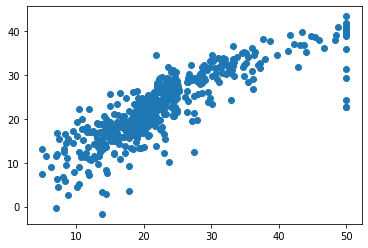

In [31]:
plt.scatter(boston_selected_var_df.price,predicted_prices)

## Mean Squared Error

In [32]:
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(boston_selected_var_df.price,predicted_prices))
error

4.9568674667600074

## Splitting the data into train and test sets

In [33]:
from sklearn.model_selection import train_test_split
x=boston_selected_var_df.drop('price',axis=1)
y=boston_selected_var_df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=3)

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()
LinReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred=LinReg.predict(x_test)

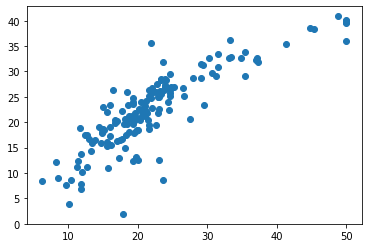

In [36]:
plt.scatter(y_test,y_pred)

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.633953533190311